# <center> Machine and Deep Learning - Project </center>
**<center> Havva Nilsu Öz** <br>



In this project we will analyze a Fashion-MNIST dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.


# **Data Loading and Preprocessing**

All of the imports of this project will be writen in the below code cell.

In [39]:
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt
import tensorflow #the backend used by Keras (there are different beckend)
from tensorflow.keras.models import Sequential #import the type of mpdel: sequential (e.g., MLP)
from tensorflow.keras.layers import Input, Dense #simple linear layer
from tensorflow.keras.utils import to_categorical # transformation for classification labels
from keras.utils.vis_utils import plot_model
from tensorflow.python.framework.random_seed import set_random_seed
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Fist we will load the dataset that is provided us.

In [40]:
def load_fashion_mnist():

    url_base = "https://www.math.unipd.it/~dasan/"
    Y_train = np.frombuffer(urlopen(url_base + "train-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_train = np.frombuffer(urlopen(url_base + "train-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_train), 784) # besides loadng 
                                                                                            #the data, I already flatten it into a vector
    Y_test = np.frombuffer(urlopen(url_base + "t10k-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_test = np.frombuffer(urlopen(url_base + "t10k-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_test), 784)

    return X_train, Y_train, X_test, Y_test

In [41]:
X_train_val, Y_train_val, X_test, Y_test = load_fashion_mnist() # you can use this function (copying the whole box) in your code to easily load the data
print(X_train_val.shape, Y_train_val.shape, X_test.shape, Y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


We reshaped the image pixels 28x28 into 784. Now we need to normalize the data.

In [42]:
X_train_val_norm = X_train_val.astype('float32') / 255
X_test_norm = X_test.astype('float32') / 255

In [43]:
#define a scaler
scaler = StandardScaler()
scaler.fit(X_train_val_norm) #remember, always training! 
X_train_scl = scaler.transform(X_train_val_norm)
X_test_scl = scaler.transform(X_test_norm)

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val_norm, Y_train_val, test_size = 0.2, shuffle=True) 

Let's check whether we loaad the data or not by using mathplot library.

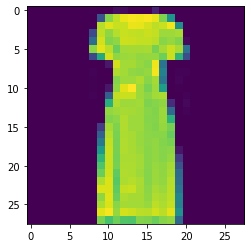

In [37]:
image = X_train_val[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

# **Models**

Now we will create some models and try to improve their accuracy. In the end we can decide which model is suitable for our dataset.

## Logistic Regression

In [7]:
lg = LogisticRegression(multi_class="multinomial", solver="lbfgs",max_iter = 100, n_jobs=-1, random_state=123)
lg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', n_jobs=-1, random_state=123)

In [31]:
%%time
y_test_lg = lg.predict(X_test_norm)

CPU times: user 70.6 ms, sys: 59.3 ms, total: 130 ms
Wall time: 116 ms


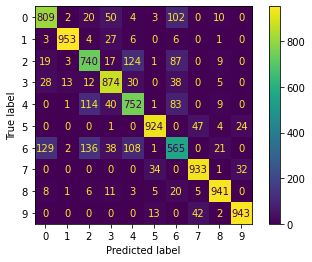

In [32]:
cm = confusion_matrix(Y_test, y_test_lg, labels=lg.classes_)
disp_lg = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg.classes_)
disp_lg.plot()
plt.show()

In [33]:
y_val_lg = lg.predict(X_val)
acc_val_lg=accuracy_score(y_val,y_val_lg)
acc_test_lg=accuracy_score(Y_test,y_test_lg)
print("Accuracy on validation set:{:.4f},\nAccuracy on test set:{:.4f}".format(
acc_val_lg, acc_test_lg))

Accuracy on validation set:0.8520,
Accuracy on test set:0.8434


## K-Nearest Neighbors

In [24]:
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2, n_jobs=-1)
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [38]:
%%time
y_test_KNN = classifier_KNN.predict(X_test_norm)

CPU times: user 1min 30s, sys: 8.02 s, total: 1min 38s
Wall time: 1min 13s


In [35]:
y_val_KNN = classifier_KNN.predict(X_val)
acc_val_KNN=accuracy_score(y_val,y_val_KNN)
acc_test_KNN=accuracy_score(Y_test,y_test_KNN)
print("Accuracy on validation set:{:.4f},\nAccuracy on test set:{:.4f}".format(acc_val_KNN, acc_test_KNN))

Accuracy on validation set:0.8535,
Accuracy on test set:0.8502


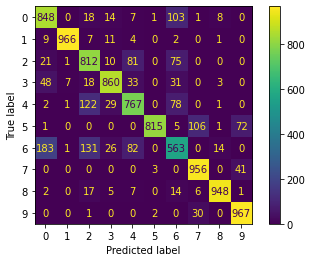

In [36]:
cm = confusion_matrix(Y_test, y_test_KNN, labels=classifier_KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier_KNN.classes_)
disp.plot()
plt.show()

## Decision Tree

In [45]:
#train the decision tree
dt_grid_params = {
    'criterion': ['entropy'],
    'max_depth': (None, 5, 10, 20),
}

dt_clf = DecisionTreeClassifier(random_state= 123)
dt_v1 = GridSearchCV(dt_clf, dt_grid_params, n_jobs= -1, cv = 5,scoring = "accuracy")
dt_v1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': (None, 5, 10, 20)},
             scoring='accuracy')

In [46]:
print(dt_v1.best_params_)
print(dt_v1.best_score_)

{'criterion': 'entropy', 'max_depth': 10}
0.805875


In [50]:
%%time
y_test_dt = dt_v1.predict(X_test_norm)

CPU times: user 21 ms, sys: 0 ns, total: 21 ms
Wall time: 24 ms


In [48]:
y_val_dt = dt_v1.predict(X_val)

In [51]:
acc_val_dt = accuracy_score(y_val,y_val_dt)
acc_test_dt = accuracy_score(Y_test,y_test_dt)
print("Accuracy on validation set:{:.4f},\nAccuracy on test set:{:.4f}".format(
acc_val_dt, acc_test_dt))

Accuracy on validation set:0.8083,
Accuracy on test set:0.8057


## Random Forest

In [52]:
#train the random forest
rf_grid_params = {
    'n_estimators': (5, 15, 25),
    'criterion': ['entropy'],
    'max_depth': ( 3, 6, 12),
}

rf_clf = RandomForestClassifier(random_state= 123)
rf_v1 = GridSearchCV(rf_clf, rf_grid_params, n_jobs= -1, cv = 5)
rf_v1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': (3, 6, 12),
                         'n_estimators': (5, 15, 25)})

In [53]:
print(rf_v1.best_params_)
print(rf_v1.best_score_)

{'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 25}
0.8636666666666667


In [54]:
%%time
y_test_rf = rf_v1.predict(X_test_norm)

CPU times: user 118 ms, sys: 2.92 ms, total: 121 ms
Wall time: 126 ms


In [55]:
y_val_rf = rf_v1.predict(X_val)

In [56]:
acc_val_rf = accuracy_score(y_val,y_val_rf)
acc_test_rf = accuracy_score(Y_test,y_test_rf)
print("Accuracy on validation set:{:.4f},\nAccuracy on test set:{:.4f}".format(
acc_val_rf, acc_test_rf))

Accuracy on validation set:0.8656,
Accuracy on test set:0.8529


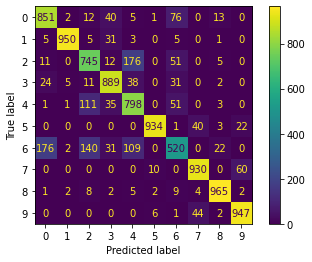

In [57]:
cm = confusion_matrix(Y_test, y_test_rf, labels=rf_v1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_v1.classes_)
disp.plot()
plt.show()

## SVM

In [58]:
svc_v1 = SVC(kernel = 'linear', C = 0.01, random_state= 123)
svc_v1.fit(X_train, y_train)

SVC(C=0.01, kernel='linear', random_state=123)

In [60]:
%%time
y_test_svc = svc_v1.predict(X_test_norm)

CPU times: user 2min 4s, sys: 68.4 ms, total: 2min 4s
Wall time: 2min 5s


In [62]:
acc_test_svc = accuracy_score(Y_test,y_test_svc)
print("Accuracy on test set:{:.4f}".format(acc_test_svc))

Accuracy on test set:0.8514


In [63]:
svc_v2 = SVC(kernel = 'linear', C = 1, random_state= 123)
svc_v2.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=123)

In [64]:
%%time
y_test_svc2 = svc_v2.predict(X_test_norm)

CPU times: user 1min 39s, sys: 63.4 ms, total: 1min 39s
Wall time: 1min 39s


In [66]:
acc_test_svc2 = accuracy_score(Y_test,y_test_svc2)
print("Accuracy on test set:{:.4f}".format(acc_test_svc2))

Accuracy on test set:0.8421


## Neural Network

We will set up the configuration options and create our model as we learned in the class.

In [68]:
# Configuration options
#see the number of labels
labels = set(Y_train_val)
print(labels, len(labels))

# Configuration options
feature_vector_length = X_train_val.shape[1] #how many features
num_classes = len(labels) #how many classes

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} 10


In [69]:
#convert to one-hot encoding representation the ground truth
y_train_val_clothes = to_categorical(Y_train_val, num_classes)
y_test_clothes = to_categorical(Y_test, num_classes)

Create a MLP called $model_1$ with:

1.   one input layer with relu as activation function. 
2.   one output layer with softmax activation.

Then, train it for 10 epochs, batch size = 16, and a validation set of 20%. 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


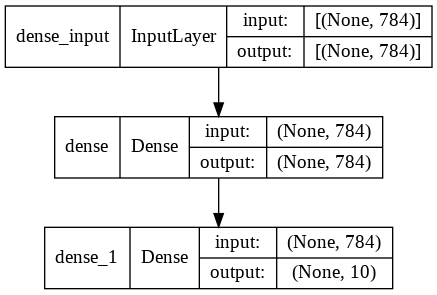

In [7]:
#add these two lines when you define a new model
np.random.seed(123)
set_random_seed(2)

model_1 = Sequential() #we first define how the "model" looks like
model_1.add(Dense(input_dim = feature_vector_length, units=feature_vector_length , activation='relu')) #input layer
model_1.add(Dense(num_classes, activation='softmax')) #output layer
print(model_1.summary())
plot_model(model_1, show_shapes= True)

In [8]:
# Configure the model and start training
model_1.compile(loss='categorical_crossentropy', #loss metric
    optimizer='sgd',  #optimizer
    metrics=['accuracy']) #displayed metric


#fit

history_1 = model_1.fit(X_train_val_norm, y_train_val_clothes, epochs=10, batch_size= 16, verbose=1, validation_split=0.2)

Epoch 1/10
3000/3000 [==============================] - 18s 6ms/step - loss: 0.6367 - accuracy: 0.7919 - val_loss: 0.5288 - val_accuracy: 0.8095
Epoch 2/10
3000/3000 [==============================] - 12s 4ms/step - loss: 0.4670 - accuracy: 0.8404 - val_loss: 0.4534 - val_accuracy: 0.8397
Epoch 3/10
3000/3000 [==============================] - 12s 4ms/step - loss: 0.4261 - accuracy: 0.8532 - val_loss: 0.4316 - val_accuracy: 0.8519
Epoch 4/10
3000/3000 [==============================] - 12s 4ms/step - loss: 0.4012 - accuracy: 0.8609 - val_loss: 0.4195 - val_accuracy: 0.8541
Epoch 5/10
3000/3000 [==============================] - 13s 4ms/step - loss: 0.3809 - accuracy: 0.8666 - val_loss: 0.3905 - val_accuracy: 0.8621
Epoch 6/10
3000/3000 [==============================] - 13s 4ms/step - loss: 0.3665 - accuracy: 0.8720 - val_loss: 0.3758 - val_accuracy: 0.8668
Epoch 7/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.3530 - accuracy: 0.8761 - val_loss: 0.3650 - val_ac

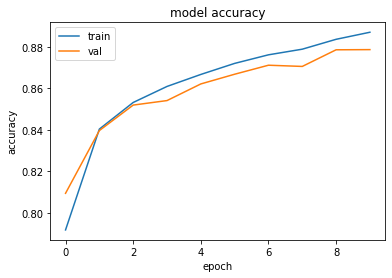

In [9]:
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

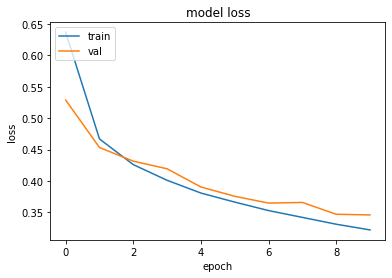

In [10]:
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
#see the testing performance of 
test_results_1 = model_1.evaluate(X_test_norm, y_test_clothes, verbose=1)
print(f'Test results - Loss: {test_results_1[0]} - Accuracy: {test_results_1[1]}%')

313/313 [==============================] - 1s 4ms/step - loss: 0.3676 - accuracy: 0.8690
Test results - Loss: 0.36761999130249023 - Accuracy: 0.8690000176429749%


We can try to improve the accuracy and loss. Let's try standard scaling and add some hidden layers to our model.

Create a MLP called $model_2$ with:

1.   one input layer with relu as activation function. 
3.   one hidden layer with 128 neurons and relu as activation function.
3.   one output layer with softmax activation.

Then, train it for 10 epochs, batch size = 16, and a validation set of 20%. 

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 784)               615440    
                                                                 
 dense_42 (Dense)            (None, 128)               100480    
                                                                 
 dense_43 (Dense)            (None, 10)                1290      
                                                                 
Total params: 717,210
Trainable params: 717,210
Non-trainable params: 0
_________________________________________________________________
None


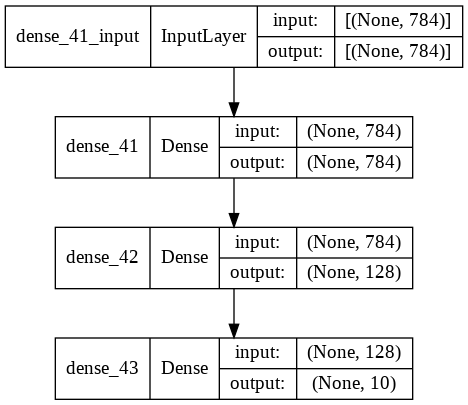

In [64]:
#add these two lines when you define a new model
np.random.seed(123)
set_random_seed(2)

model_2 = Sequential() #we first define how the "model" looks like
model_2.add(Dense(input_dim = feature_vector_length, units=feature_vector_length , activation='relu')) #input layer
model_2.add(Dense(128 , activation='relu')) #input layer
model_2.add(Dense(num_classes, activation='softmax')) #output layer
print(model_2.summary())
plot_model(model_2, show_shapes= True)

In [65]:
# Configure the model and start training
model_2.compile(loss='categorical_crossentropy', #loss metric
    optimizer='sgd',  #optimizer
    metrics=['accuracy']) #displayed metric

#fit

history_2 = model_2.fit(X_train_val_norm, y_train_val_clothes, epochs=10, batch_size= 16, verbose=1, validation_split=0.2)


Epoch 1/10
3000/3000 [==============================] - 15s 5ms/step - loss: 0.6195 - accuracy: 0.7889 - val_loss: 0.4991 - val_accuracy: 0.8201
Epoch 2/10
3000/3000 [==============================] - 17s 6ms/step - loss: 0.4418 - accuracy: 0.8449 - val_loss: 0.4277 - val_accuracy: 0.8500
Epoch 3/10
3000/3000 [==============================] - 18s 6ms/step - loss: 0.3971 - accuracy: 0.8605 - val_loss: 0.4031 - val_accuracy: 0.8589
Epoch 4/10
3000/3000 [==============================] - 15s 5ms/step - loss: 0.3695 - accuracy: 0.8688 - val_loss: 0.3911 - val_accuracy: 0.8630
Epoch 5/10
3000/3000 [==============================] - 16s 5ms/step - loss: 0.3471 - accuracy: 0.8760 - val_loss: 0.3580 - val_accuracy: 0.8721
Epoch 6/10
3000/3000 [==============================] - 16s 5ms/step - loss: 0.3305 - accuracy: 0.8807 - val_loss: 0.3457 - val_accuracy: 0.8753
Epoch 7/10
3000/3000 [==============================] - 16s 5ms/step - loss: 0.3159 - accuracy: 0.8860 - val_loss: 0.3380 - val_ac

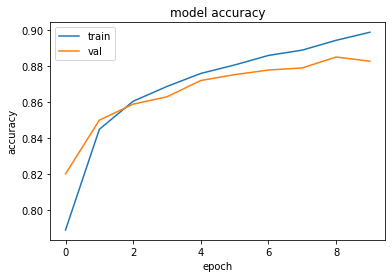

In [66]:
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

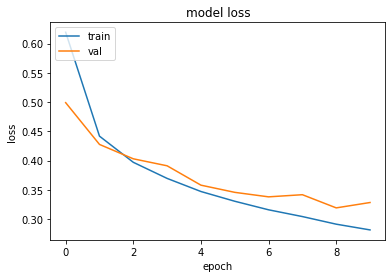

In [67]:
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [68]:
#see the testing performance of 
test_results_2 = model_2.evaluate(X_test_norm, y_test_clothes, verbose=1)
print(f'Test results - Loss: {test_results_2[0]} - Accuracy: {test_results_2[1]}%')

313/313 [==============================] - 2s 4ms/step - loss: 0.3497 - accuracy: 0.8760
Test results - Loss: 0.3497407138347626 - Accuracy: 0.8759999871253967%


Now we can try to add more hidden layers

Create a MLP called $model_3$ with two layers:

1.   one input layer with relu as activation function. 
3.   six hidden layer with 128 neurons and relu as activation function.
3.   one output layer with softmax activation.

Then, train it for 10 epochs, batch size = 16, and a validation set of 20%. 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)              

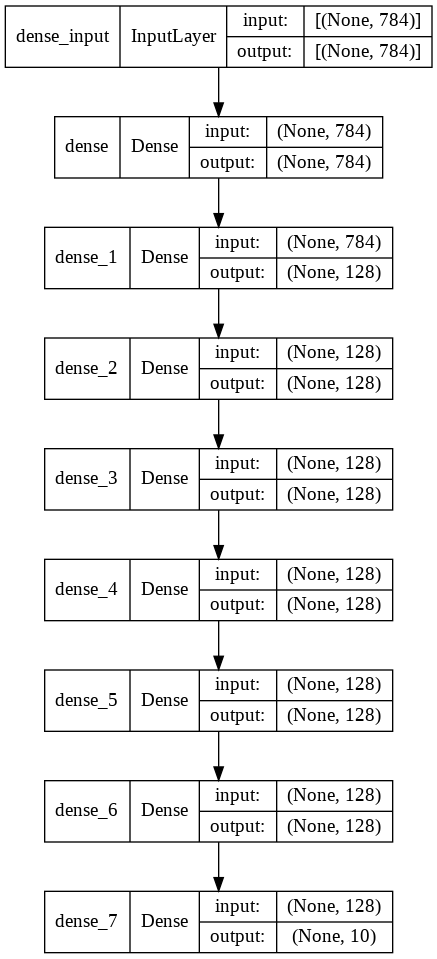

In [70]:
#add these two lines when you define a new model
np.random.seed(123)
set_random_seed(2)

model_3 = Sequential() #we first define how the "model" looks like
model_3.add(Dense(input_dim = feature_vector_length, units=feature_vector_length , activation='relu')) #input layer
model_3.add(Dense(128 , activation='relu')) #hidden layer
model_3.add(Dense(128 , activation='relu')) #hidden layer
model_3.add(Dense(128 , activation='relu')) #hidden layer
model_3.add(Dense(128 , activation='relu')) #hidden layer
model_3.add(Dense(128 , activation='relu')) #hidden layer
model_3.add(Dense(128 , activation='relu')) #hidden layer
model_3.add(Dense(num_classes, activation='softmax')) #output layer
print(model_3.summary())
plot_model(model_3, show_shapes= True)

In [71]:
# Configure the model and start training
model_3.compile(loss='categorical_crossentropy', #loss metric
    optimizer='sgd',  #optimizer
    metrics=['accuracy']) #displayed metric

#fit
history_3 = model_3.fit(X_train_val_norm, y_train_val_clothes, epochs=10, batch_size= 16, verbose=2, validation_split=0.2)

Epoch 1/10
3000/3000 - 19s - loss: 0.7432 - accuracy: 0.7370 - val_loss: 0.5061 - val_accuracy: 0.8167 - 19s/epoch - 6ms/step
Epoch 2/10
3000/3000 - 18s - loss: 0.4369 - accuracy: 0.8413 - val_loss: 0.4262 - val_accuracy: 0.8440 - 18s/epoch - 6ms/step
Epoch 3/10
3000/3000 - 17s - loss: 0.3780 - accuracy: 0.8624 - val_loss: 0.3770 - val_accuracy: 0.8645 - 17s/epoch - 6ms/step
Epoch 4/10
3000/3000 - 17s - loss: 0.3463 - accuracy: 0.8726 - val_loss: 0.3734 - val_accuracy: 0.8630 - 17s/epoch - 6ms/step
Epoch 5/10
3000/3000 - 19s - loss: 0.3204 - accuracy: 0.8813 - val_loss: 0.3526 - val_accuracy: 0.8765 - 19s/epoch - 6ms/step
Epoch 6/10
3000/3000 - 19s - loss: 0.3034 - accuracy: 0.8878 - val_loss: 0.3370 - val_accuracy: 0.8820 - 19s/epoch - 6ms/step
Epoch 7/10
3000/3000 - 16s - loss: 0.2890 - accuracy: 0.8928 - val_loss: 0.3238 - val_accuracy: 0.8846 - 16s/epoch - 5ms/step
Epoch 8/10
3000/3000 - 17s - loss: 0.2740 - accuracy: 0.8971 - val_loss: 0.3464 - val_accuracy: 0.8802 - 17s/epoch - 6

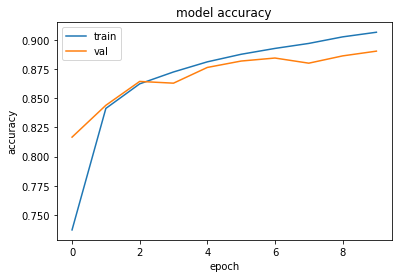

In [72]:
# summarize history for accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

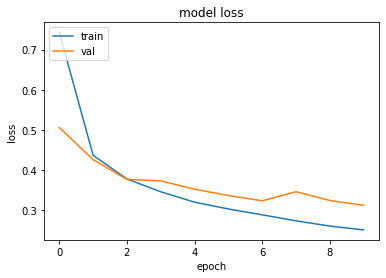

In [73]:
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [74]:
#see the testing performance of 
%%time
test_results_3 = model_3.evaluate(X_test_norm, y_test_clothes, verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.3322 - accuracy: 0.8844
CPU times: user 1.98 s, sys: 99.2 ms, total: 2.07 s
Wall time: 2.75 s


In [75]:
print(f'Test results - Loss: {test_results_3[0]} - Accuracy: {test_results_3[1]}%')

Test results - Loss: 0.33222368359565735 - Accuracy: 0.8844000101089478%


Now we will try the same layer as model_3 with EarlyStopping

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_146 (Dense)           (None, 784)               615440    
                                                                 
 dense_147 (Dense)           (None, 128)               100480    
                                                                 
 dense_148 (Dense)           (None, 128)               16512     
                                                                 
 dense_149 (Dense)           (None, 128)               16512     
                                                                 
 dense_150 (Dense)           (None, 128)               16512     
                                                                 
 dense_151 (Dense)           (None, 128)               16512     
                                                                 
 dense_152 (Dense)           (None, 128)             

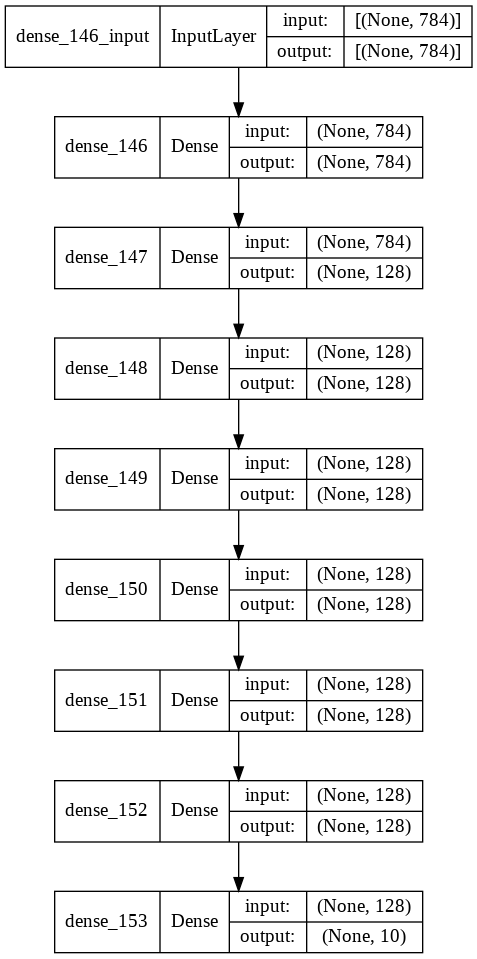

In [119]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', #quantity to be monitored
                   mode='min', #we look for decreasing patterns stop 
                   patience = 3, #number of epochs with no improvement
                   verbose=1)

#add these two lines when you define a new model
np.random.seed(123)
set_random_seed(2)

model_4 = Sequential() #we first define how the "model" looks like
model_4.add(Dense(input_dim = feature_vector_length, units=feature_vector_length , activation='relu')) #input layer
model_4.add(Dense(128 , activation='relu')) #input layer
model_4.add(Dense(128 , activation='relu')) #input layer
model_4.add(Dense(128 , activation='relu')) #input layer
model_4.add(Dense(128 , activation='relu')) #input layer
model_4.add(Dense(128 , activation='relu')) #input layer
model_4.add(Dense(128 , activation='relu')) #input layer
model_4.add(Dense(num_classes, activation='softmax')) #output layer
print(model_4.summary())
plot_model(model_4, show_shapes= True)

In [120]:
# Configure the model and start training
model_4.compile(loss='categorical_crossentropy', #loss metric
    optimizer='sgd',  #optimizer
    metrics=['accuracy']) #displayed metric

#fit

history_4 = model_4.fit(X_train_val_norm, y_train_val_clothes, epochs=500, batch_size=16, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/500
3000/3000 [==============================] - 18s 6ms/step - loss: 0.7432 - accuracy: 0.7370 - val_loss: 0.5061 - val_accuracy: 0.8167
Epoch 2/500
3000/3000 [==============================] - 18s 6ms/step - loss: 0.4369 - accuracy: 0.8413 - val_loss: 0.4262 - val_accuracy: 0.8440
Epoch 3/500
3000/3000 [==============================] - 17s 6ms/step - loss: 0.3780 - accuracy: 0.8624 - val_loss: 0.3770 - val_accuracy: 0.8645
Epoch 4/500
3000/3000 [==============================] - 17s 6ms/step - loss: 0.3463 - accuracy: 0.8726 - val_loss: 0.3734 - val_accuracy: 0.8630
Epoch 5/500
3000/3000 [==============================] - 18s 6ms/step - loss: 0.3204 - accuracy: 0.8813 - val_loss: 0.3526 - val_accuracy: 0.8765
Epoch 6/500
3000/3000 [==============================] - 19s 6ms/step - loss: 0.3034 - accuracy: 0.8878 - val_loss: 0.3370 - val_accuracy: 0.8820
Epoch 7/500
3000/3000 [==============================] - 19s 6ms/step - loss: 0.2890 - accuracy: 0.8928 - val_loss: 0.3238 -

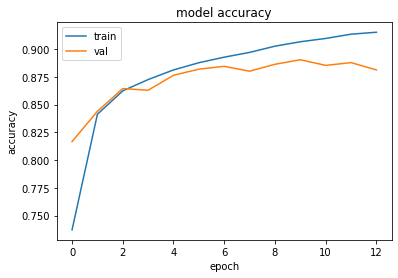

In [121]:
# summarize history for accuracy
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

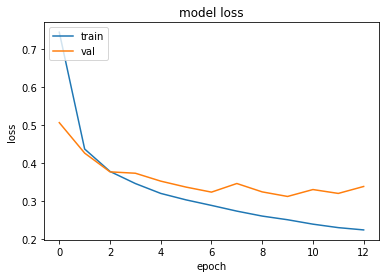

In [122]:
# summarize history for loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [123]:
#see the testing performance of 
test_results_4 = model_4.evaluate(X_test_norm, y_test_clothes, verbose=1)
print(f'Test results - Loss: {test_results_4[0]} - Accuracy: {test_results_4[1]}%')

313/313 [==============================] - 2s 5ms/step - loss: 0.3642 - accuracy: 0.8749
Test results - Loss: 0.36417466402053833 - Accuracy: 0.8748999834060669%


Lastly, let's try to increase batch size

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 784)               615440    
                                                                 
 dense_155 (Dense)           (None, 128)               100480    
                                                                 
 dense_156 (Dense)           (None, 128)               16512     
                                                                 
 dense_157 (Dense)           (None, 128)               16512     
                                                                 
 dense_158 (Dense)           (None, 128)               16512     
                                                                 
 dense_159 (Dense)           (None, 128)               16512     
                                                                 
 dense_160 (Dense)           (None, 128)             

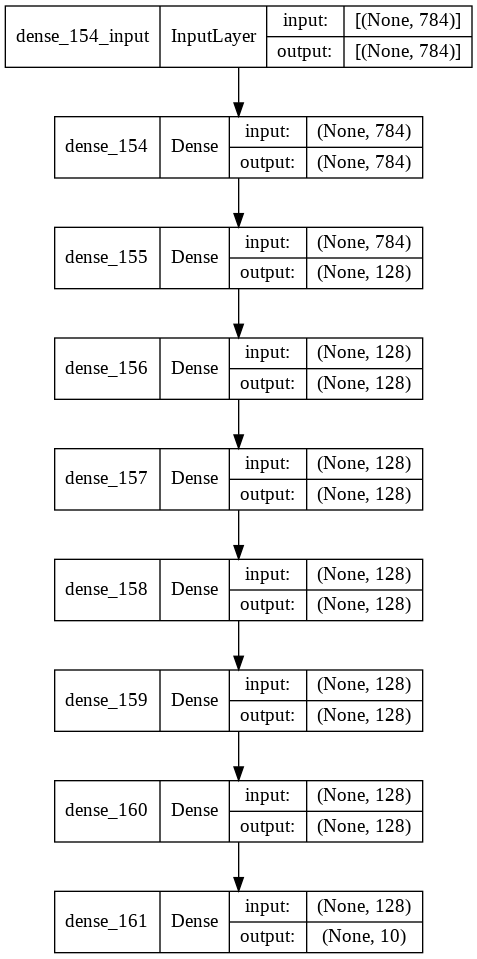

In [124]:
#add these two lines when you define a new model
np.random.seed(123)
set_random_seed(2)

model_5 = Sequential() #we first define how the "model" looks like
model_5.add(Dense(input_dim = feature_vector_length, units=feature_vector_length , activation='relu')) #input layer
model_5.add(Dense(128 , activation='relu')) #input layer
model_5.add(Dense(128 , activation='relu')) #input layer
model_5.add(Dense(128 , activation='relu')) #input layer
model_5.add(Dense(128 , activation='relu')) #input layer
model_5.add(Dense(128 , activation='relu')) #input layer
model_5.add(Dense(128 , activation='relu')) #input layer
model_5.add(Dense(num_classes, activation='softmax')) #output layer
print(model_5.summary())
plot_model(model_5, show_shapes= True)

In [125]:
# Configure the model and start training
model_5.compile(loss='categorical_crossentropy', #loss metric
    optimizer='sgd',  #optimizer
    metrics=['accuracy']) #displayed metric

#fit

history_5 = model_5.fit(X_train_val_norm, y_train_val_clothes, epochs=10, batch_size= 32, verbose=2, validation_split=0.2)

Epoch 1/10
1500/1500 - 10s - loss: 0.9193 - accuracy: 0.6831 - val_loss: 0.5993 - val_accuracy: 0.7782 - 10s/epoch - 7ms/step
Epoch 2/10
1500/1500 - 10s - loss: 0.4993 - accuracy: 0.8239 - val_loss: 0.4832 - val_accuracy: 0.8191 - 10s/epoch - 6ms/step
Epoch 3/10
1500/1500 - 10s - loss: 0.4255 - accuracy: 0.8496 - val_loss: 0.4090 - val_accuracy: 0.8558 - 10s/epoch - 7ms/step
Epoch 4/10
1500/1500 - 10s - loss: 0.3841 - accuracy: 0.8615 - val_loss: 0.4026 - val_accuracy: 0.8522 - 10s/epoch - 7ms/step
Epoch 5/10
1500/1500 - 10s - loss: 0.3531 - accuracy: 0.8715 - val_loss: 0.3768 - val_accuracy: 0.8633 - 10s/epoch - 6ms/step
Epoch 6/10
1500/1500 - 10s - loss: 0.3330 - accuracy: 0.8786 - val_loss: 0.3439 - val_accuracy: 0.8762 - 10s/epoch - 6ms/step
Epoch 7/10
1500/1500 - 10s - loss: 0.3153 - accuracy: 0.8840 - val_loss: 0.3355 - val_accuracy: 0.8800 - 10s/epoch - 7ms/step
Epoch 8/10
1500/1500 - 10s - loss: 0.3008 - accuracy: 0.8885 - val_loss: 0.3461 - val_accuracy: 0.8763 - 10s/epoch - 7

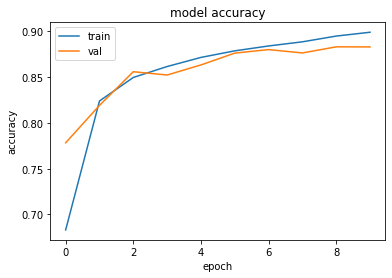

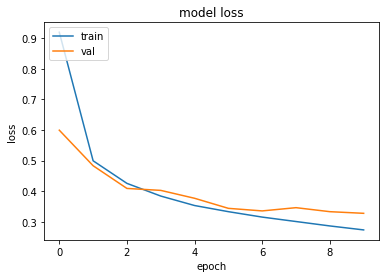

In [126]:
# summarize history for accuracy
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()
# summarize history for loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [127]:
#see the testing performance of 
test_results_5 = model_5.evaluate(X_test_norm, y_test_clothes, verbose=1)
print(f'Test results - Loss: {test_results_5[0]} - Accuracy: {test_results_5[1]}%')

313/313 [==============================] - 2s 4ms/step - loss: 0.3479 - accuracy: 0.8760
Test results - Loss: 0.3479377031326294 - Accuracy: 0.8759999871253967%
